In [2]:
#import libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

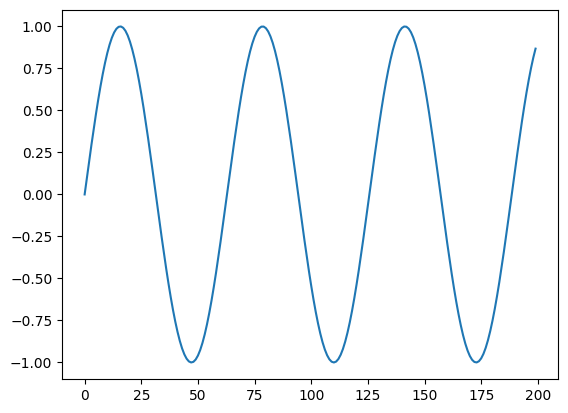

In [3]:
# make original data
series =  np.sin(0.1*np.arange(200)) #+ np.random.randn(200)*0.1

#plot it
plt.plot(series)
plt.show()

In [4]:
#build the dataset
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [5]:
#autoregressive RNN model
i = Input(shape = (T, 1))
x = SimpleRNN(5, activation = 'relu')(i)
x = Dense(1)(x)
model = Model(i, x)

model.compile(loss = 'mse', optimizer = Adam(lr = 0.1))

# train the model

r = model.fit(X[:-N//2], Y[:-N//2], epochs = 80, validation_data = (X[-N//2:], Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 2s 241ms/step - loss: 1.7964 - val_loss: 1.2763
Epoch 2/80
3/3 [==============================] - 0s 56ms/step - loss: 1.7231 - val_loss: 1.2345
Epoch 3/80
3/3 [==============================] - 0s 38ms/step - loss: 1.6660 - val_loss: 1.1965
Epoch 4/80
3/3 [==============================] - 0s 32ms/step - loss: 1.6080 - val_loss: 1.1691
Epoch 5/80
3/3 [==============================] - 0s 34ms/step - loss: 1.5721 - val_loss: 1.1406
Epoch 6/80
3/3 [==============================] - 0s 57ms/step - loss: 1.5343 - val_loss: 1.1090
Epoch 7/80
3/3 [==============================] - 0s 39ms/step - loss: 1.4844 - val_loss: 1.0756
Epoch 8/80
3/3 [==============================] - 0s 42ms/step - loss: 1.4331 - val_loss: 1.0394
Epoch 9/80
3/3 [==============================] - 0s 66ms/step - loss: 1.3782 - val_loss: 0.9998
Epoch 10/80
3/3 [==============================] - 0s 43ms/step - loss: 1.3152 - val_loss: 0.9577
Epoch 11/80
3/3 [===========

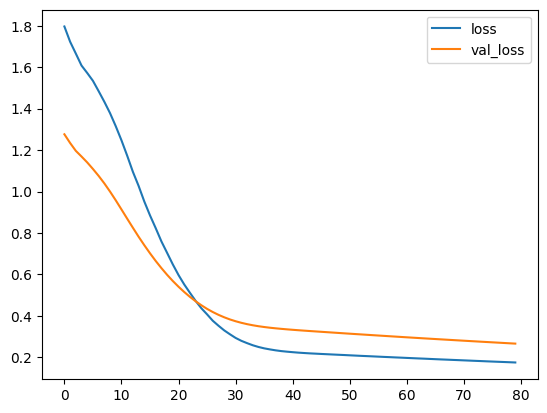

In [6]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [7]:
# "Wrong prediction forecast using true targets"

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1

  #update the predictions list
  validation_predictions.append(p)

1/1 [==============================] - 0s 23ms/step


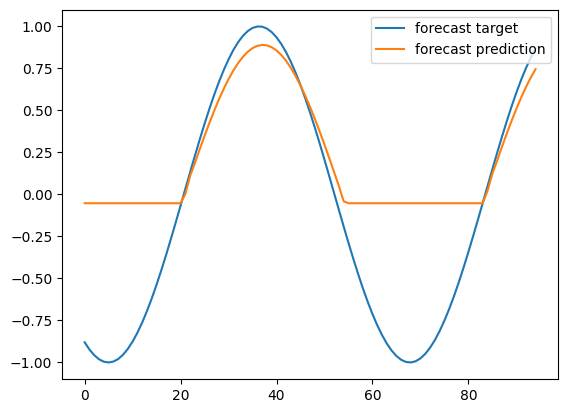

In [8]:
plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()

In [9]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2] #1=D array of length

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] #1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  #make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 22ms/step


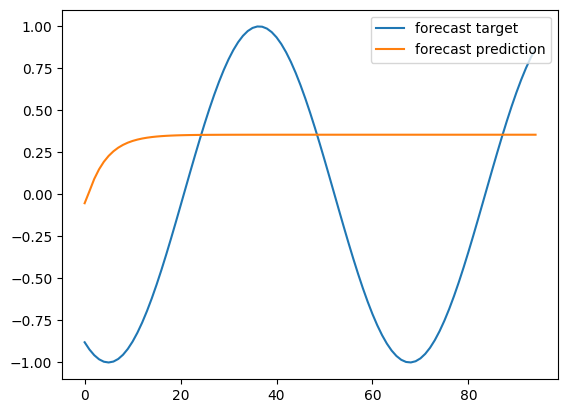

In [10]:
plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()